# Resolução da lista 2 de NLP
## Alunos:
    - Eduardo Brasil Araujo
    - Gideão Pinheiro

In [2]:
import pandas as pd
import numpy as np

# Questão 1

# Questão 2

In [5]:
data = pd.read_csv('../datasets/website_classification.csv')

In [6]:
X_train = data.cleaned_website_text

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,1),
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_features=1000)

np.random.seed(123)

np.random.shuffle(np.array(X_train))

X = count_vectorizer.fit_transform(X_train)

In [6]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

search_params = {
  'n_components': list(range(1, 11)),
}

lda = LatentDirichletAllocation()

grid_search = GridSearchCV(lda,
                           param_grid=search_params,
                           n_jobs=4,
                           verbose=1,
                           cv=4)
grid_search.fit(X)

print(f'Best model\'s Params: {grid_search.best_params_}')
print(f'Best log likelihood score: {grid_search.best_score_}')

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Best model's Params: {'n_components': 8}
Best log likelihood score: -879556.7284202282


### Respondendo item (a) da 2ª questão:

- Referência: https://investigate.ai/text-analysis/choosing-the-right-number-of-topics-for-a-scikit-learn-topic-model/

É notório que o modelo LDA é melhor para realizar a avaliação de quantos
tópicos utilizar, pois ele proporciona uma métrica de avaliação bem definida,
diferentemente de outros modelos como NMF (pelo menos no scikit-learn).

Assim, foi utilizado este modelo para avaliar a quantidade de tópicos, e
então, foi feito uma busca em grade pela combinação de parâmetros mais bem
adaptados ao problema; com o GridSearchCV. 

O melhor resultado foi com o número de componentes (número de tópicos)
igual a 5. Porém, como pode ser observado no item b desta mesma questão,
na tabela mostrada abaixo dos tópicos foram observadas alguma anomalias.
A tabela em questão é uma distribuição dos documentos em relação aos
tópicos gerados, ou seja, o número representa a incidência dos tópicos em
relação à base. A primeira anomalia observada é em SVD, com os valores
sendo negativos. A segunda anomalia observada é o NMF com uma coluna com
todos os valores zerados. As anomalias observadas são facilmente
resolvidas diminuindo a quantidade de tópicos para 4, que, logo, será a
quantidade final de tópicos escolhidos.

In [8]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

In [8]:
# Value
number_of_components = 4

# LDA
lda = LatentDirichletAllocation(n_components=number_of_components)
lda_topics = lda.fit_transform(X)

# SVD
svd = TruncatedSVD(n_components=number_of_components)
svd_topics = svd.fit_transform(X)

# NMF
nmf = NMF(n_components=number_of_components)
nmf_topics = nmf.fit_transform(X)

In [9]:
def get_topic_list(model, feature_names, n_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_n = ['_'.join(feature_names[i].split())
                for i in topic.argsort()
                [-n_words:]][::-1]
        top_features = ' '.join(top_n)
        topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

        print(f"Topic {topic_idx}: {top_features}")
    return topic_list

### Respostas ao item (b) da 2ª questão:

- Referência: https://www.freecodecamp.org/news/advanced-topic-modeling-how-to-use-svd-nmf-in-python/

In [10]:
# LDA
top_feature_names = count_vectorizer.get_feature_names_out()

topic_list = get_topic_list(lda, top_feature_names, 5)

amounts = lda.transform(X) * 100
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head()

Topic 0: news december world league ago
Topic 1: recipe add gift new view
Topic 2: health photography read new care
Topic 3: chat new free video tv


,topic_news_december_world,topic_recipe_add_gift,topic_health_photography_read,topic_chat_new_free
0,0.065384,74.304129,0.793617,24.836870
1,0.903990,67.579278,2.496995,29.019736
2,0.138365,68.384267,6.508043,24.969325
3,0.615846,49.914708,0.031649,49.437798
4,0.068317,19.005112,0.068971,80.857601


In [11]:
# SVD
topic_list = get_topic_list(svd, top_feature_names, 5)

amounts = svd.transform(X) * 100
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head()

Topic 0: news late trend new world
Topic 1: sex phone add cart free
Topic 2: add cart quality good fresh
Topic 3: tv movie series comedy tvma


,topic_news_late_trend,topic_sex_phone_add,topic_add_cart_quality,topic_tv_movie_series
0,421.204540,470.428073,321.653629,732.432968
1,565.180871,716.907917,293.251035,980.094182
2,253.582592,315.721848,222.886325,424.660902
3,1005.061321,1106.814009,732.585516,1520.192460
4,469.457417,554.914904,375.327349,809.873187


In [12]:
# NMF
topic_list = get_topic_list(nmf, top_feature_names, 5)

amounts = nmf.transform(X) * 100
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head()

Topic 0: news late trend india new
Topic 1: sex phone free hot gay
Topic 2: add cart quality fresh good
Topic 3: tv movie series comedy tvma


,topic_news_late_trend,topic_sex_phone_free,topic_add_cart_quality,topic_tv_movie_series
0,2.866815,1.825468,6.045565,33.891438
1,3.838170,6.576929,5.246591,45.258196
2,1.626564,1.636281,5.058541,20.275164
3,8.544271,6.026568,15.552746,72.585470
4,3.004599,2.505878,7.496795,38.040052


### Resposta do item (c) da 2ª questão:

In [13]:
# Choosing documents
indexes = np.random.choice(range(len(data)), 5)
choosen_documents = []
choosen_documents_categories = []
for index in indexes:
    choosen_documents_categories.append(data.Category[index])
    choosen_documents.append(data.cleaned_website_text[index])
choosen_documents = np.array(choosen_documents)
choosen_documents_categories = np.array(choosen_documents_categories)

In [14]:
num_topics = 3

count_vectorizer_3 = CountVectorizer(ngram_range=(1,1),
                                   stop_words='english',
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_features=1000)

choosen_documents_converted = count_vectorizer.fit_transform(choosen_documents)

# LDA
lda_3 = LatentDirichletAllocation(n_components=num_topics)
lda_3.fit(choosen_documents_converted)

# SVD
svd_3 = TruncatedSVD(n_components=num_topics)
svd_3.fit(choosen_documents_converted)

# NMF
nmf_3 = NMF(n_components=num_topics)
nmf_3.fit(choosen_documents_converted)

NMF(n_components=3)

In [15]:
feature_names = count_vectorizer.get_feature_names_out()

print('LDA Topics')
lda_topics_str = get_topic_list(lda_3, feature_names, 5)
print('SVD Topics')
svd_topics_str = get_topic_list(svd_3, feature_names, 5)
print('NMF Topics')
nmf_topics_str = get_topic_list(nmf_3, feature_names, 5)

LDA Topics
Topic 0: movie gostream watch site new
Topic 1: affordable men shoe usd skip
Topic 2: cab meru service book syncona
SVD Topics
Topic 0: movie gostream watch site new
Topic 1: cab meru service book ride
Topic 2: syncona therapy therapeutics overview gene
NMF Topics
Topic 0: movie gostream watch site new
Topic 1: cab meru service book ride
Topic 2: syncona therapeutics therapy overview gene


In [16]:
# Escrevendo documento para ler os dados
with open('output_file.txt', 'wb') as fp:
    for outer_index, line in enumerate(choosen_documents.tolist()):
        fp.write(f'\n{"#" * 30}\n'.encode('utf-8'))
        fp.write(f'\n{choosen_documents_categories[outer_index]}\n\n'.encode('utf-8'))
        for index, word in enumerate(line.split()):
            fp.write(f'{word} '.encode('utf-8'))
            if (index + 1) % 12 == 0:
                fp.write('\n'.encode('utf-8'))

### Resposta do item (d) da 2ª questão:

- Referência: https://stackoverflow.com/questions/60613532/how-do-i-calculate-the-coherence-score-of-an-sklearn-lda-model#62151839

In [18]:
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora

In [19]:
def get_Cv(model, df_columnm):
  topics = model.components_

  n_top_words = 20
  texts = [[word for word in doc.split()] for doc in df_columnm]

  # create the dictionary
  dictionary = corpora.Dictionary(texts)
  # Create a gensim dictionary from the word count matrix

  # Create a gensim corpus from the word count matrix
  corpus = [dictionary.doc2bow(text) for text in texts]

  feature_names = [dictionary[i] for i in range(len(dictionary))]

  # Get the top words for each topic from the components_ attribute
  top_words = []
  for topic in topics:
      top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])

  coherence_model = CoherenceModel(topics=top_words, texts=texts, dictionary=dictionary, coherence='c_v')
  coherence = coherence_model.get_coherence()
  return coherence

In [20]:
lda_coherence = get_Cv(lda, X_train)
svd_coherence = get_Cv(svd, X_train)
nmf_coherence = get_Cv(nmf, X_train)

In [21]:
print(lda_coherence)
print(svd_coherence)
print(nmf_coherence)

0.43673308500256264
0.42934015046222385
0.42701229768501564


In [22]:
lda_3_coherence = get_Cv(lda_3, choosen_documents)
svd_3_coherence = get_Cv(svd_3, choosen_documents)
nmf_3_coherence = get_Cv(nmf_3, choosen_documents)

In [23]:
print(lda_3_coherence)
print(svd_3_coherence)
print(nmf_3_coherence)

0.6365118553433572
0.6506473326801162
0.6508921490018772


### Justificativa

É notório que os resultados dos três modelos foram similares, tanto numa análise
manual, com a leitura de cada um deles. Como também com a métrica de coerência
(métrica que avalia a interpretabilidade dos tópicos) apresenta-se altamente
similar, mas que, ao mesmo tempo, percebe-se que o modelo SVD se saiu bem em
ambos os testes (o com a base toda e outro com somente 5 documentos). Portanto,
o SVD é escolhido como o que melhor se desempenhou, contudo os resultados são
praticamente os mesmos.

# Questão 3

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


text_data = data['cleaned_website_text']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)


### Item a

In [25]:

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X.toarray())

dimensionality_after_pca = X_pca.shape[1]
print(f"Dimensão após PCA: {dimensionality_after_pca}")


Dimensão após PCA: 429


### Item b

/home/gideaopinheiro/Projects/natural-language-processing/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gideaopinheiro/Projects/natural-language-processing/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gideaopinheiro/Projects/natural-language-processing/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/gideaopinheiro/Projects/n

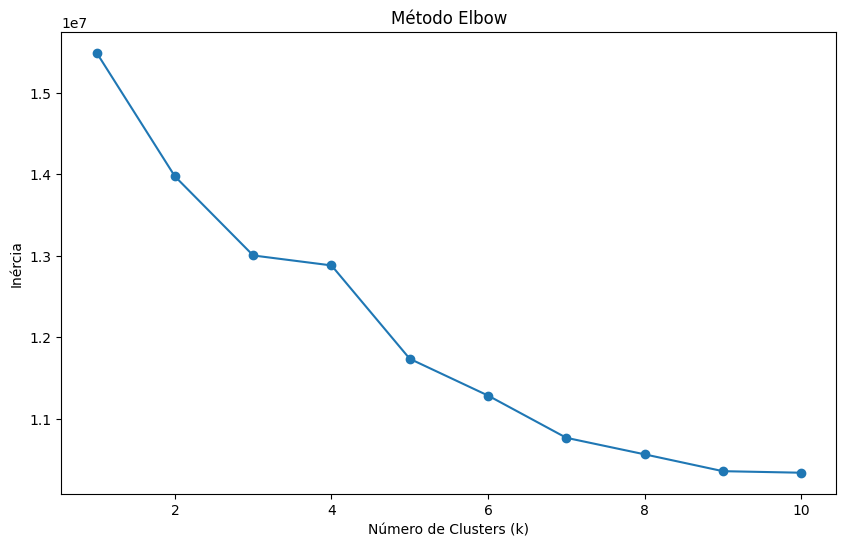

In [26]:

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()


# Questão 4

In [11]:
from sklearn.manifold import TSNE
import umap.umap_ as umap
import time

text_data = data['cleaned_website_text']
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X.toarray())
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)


/home/gideaopinheiro/Projects/natural-language-processing/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Item A

/home/gideaopinheiro/Projects/natural-language-processing/venv/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gideaopinheiro/Projects/natural-language-processing/venv/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/gideaopinh

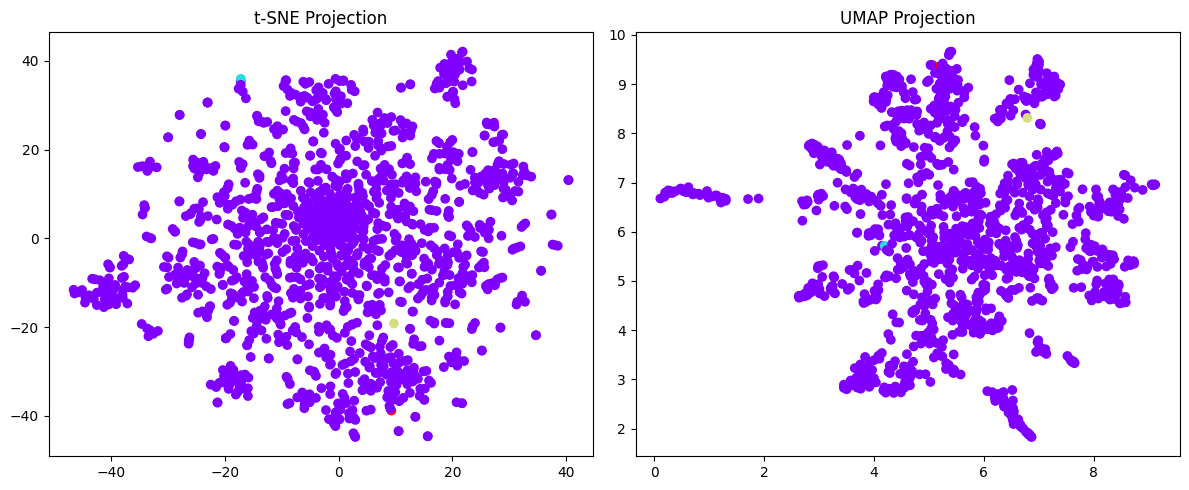

In [13]:


tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


umap_model = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap = umap_model.fit_transform(X_pca)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('t-SNE Projection')

plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('UMAP Projection')

plt.tight_layout()
plt.show()


### Item B.1

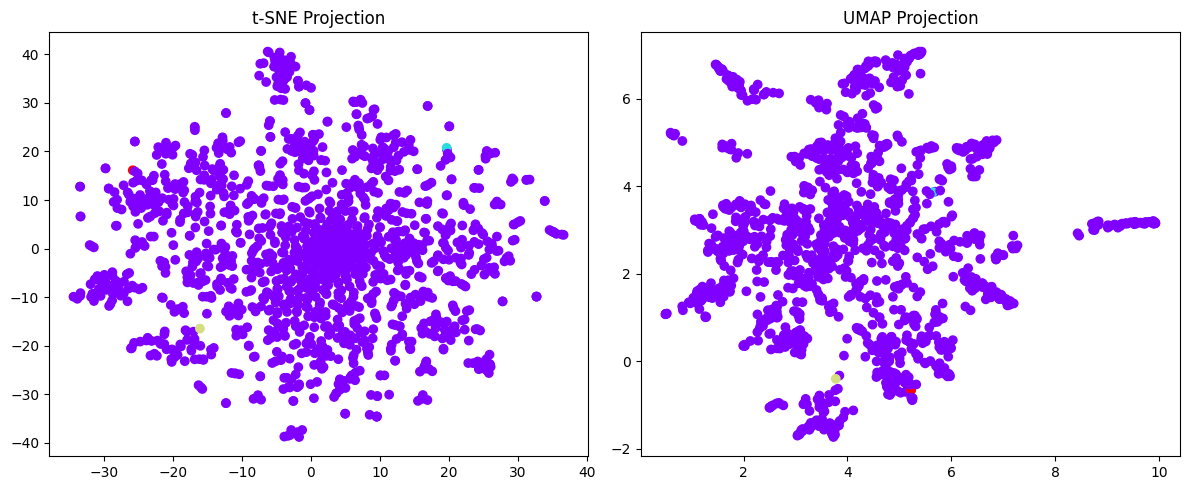

In [15]:

tsne = TSNE(n_components=2, perplexity=45, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


umap_model = umap.UMAP(n_components=2, n_neighbors=10, random_state=42)
X_umap = umap_model.fit_transform(X_pca)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('t-SNE Projection')

plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('UMAP Projection')

plt.tight_layout()
plt.show()

### Item B.2

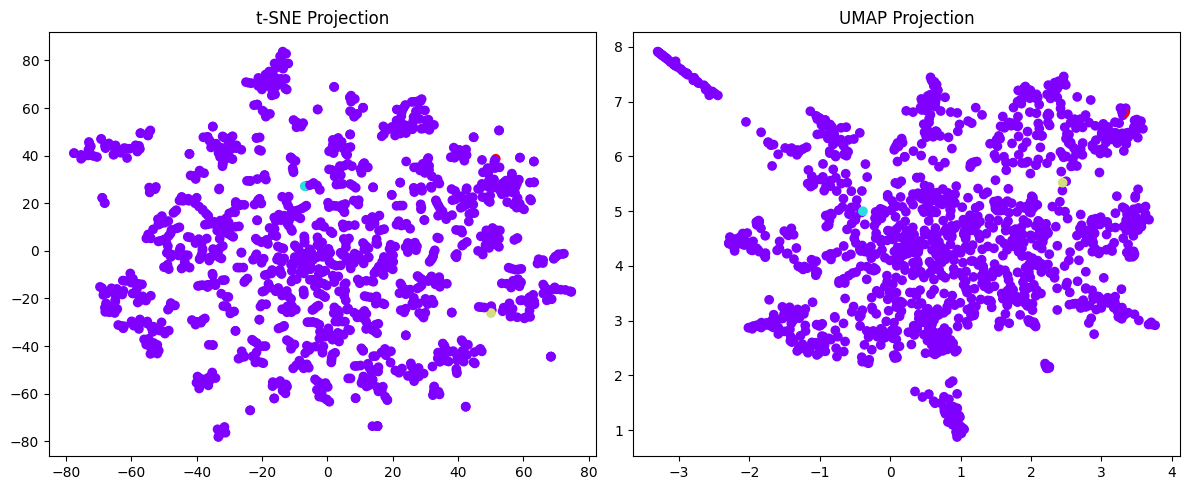

In [20]:

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(X_pca)


umap_model = umap.UMAP(n_components=2, n_neighbors=25, random_state=42)
X_umap = umap_model.fit_transform(X_pca)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('t-SNE Projection')

plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('UMAP Projection')

plt.tight_layout()
plt.show()

Na projeção t-SNE os dados ficam mais dispersos quando o falor do parâmetro 'perplexity' diminui, a mesma coisa acontece quando o valor de n_neighbors aumenta na projeção UMAP.


### Item C

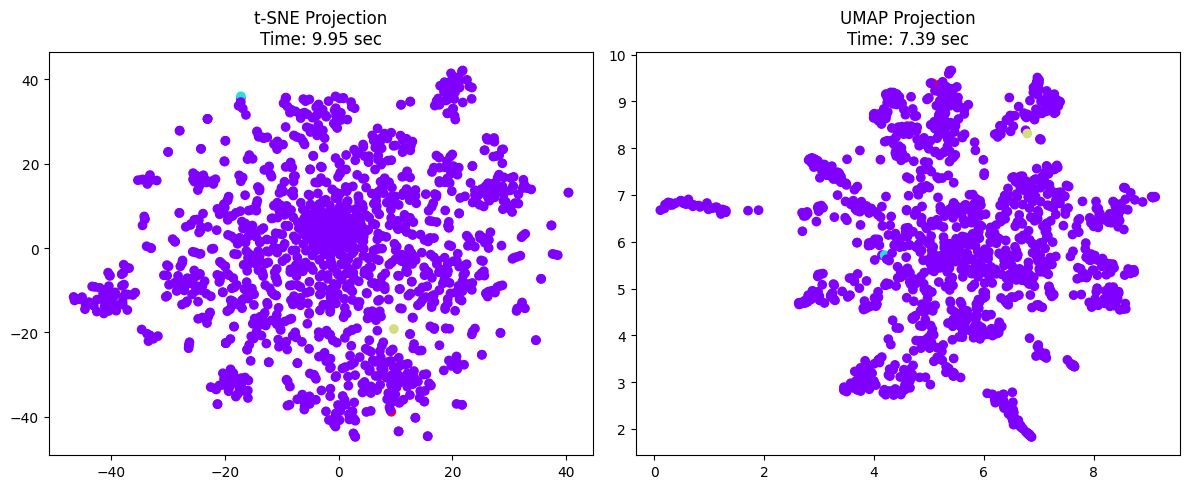

In [14]:

start_time = time.time()
umap_model_best = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap_best = umap_model_best.fit_transform(X_pca)
umap_time = time.time() - start_time

start_time = time.time()
tsne_best = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_best = tsne_best.fit_transform(X_pca)
tsne_time = time.time() - start_time

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne_best[:, 0], X_tsne_best[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title(f't-SNE Projection\nTime: {tsne_time:.2f} sec')

plt.subplot(1, 2, 2)
plt.scatter(X_umap_best[:, 0], X_umap_best[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title(f'UMAP Projection\nTime: {umap_time:.2f} sec')

plt.tight_layout()
plt.show()


t-SNE se saiu pior que UMAP no tempo de execução, mas se mostrou melhor no quesito 'qualidade visual'.